# <font color='green'>UCI Audit Risk Project Part 1: Classification
### MIS 6V99.003 Machine Learning 
#### Abhishek Patil 


### Table of Contents:
1. [Data Pre-processing](#Data-Pre-processing)
    * [Importing Datasets](#Importing-Datasets)
    * [Exploring Data](#Exploring-Data)
    * [Merging Dataframes](#Merging-Dataframes)
    * [Data Cleaning](#Data-Cleaning)
    
    
2. [Correlation Matrix](#Correlation-Matrix)


3. [Classification](#Classification)
    * [Classification: Train-Test Split](#Classification:-Train-Test-Split)
    * [Classification: Feature Scaling](#Classification:-Feature-Scaling)
    * [Classification Models](#Classification:-Models)
        * [Voting Classifiers](#Voting-Classifiers)
            * [Hard Voting Classifier 1](#Hard-Voting-Classifier-1)
            * [Hard Voting Classifier 2](#Hard-Voting-Classifier-2)
            * [Soft Voting Classifier 1](#Soft-Voting-Classifier-1)
            * [Soft Voting Classifier 2](#Soft-Voting-Classifier-2)
        * [Bagging](#Bagging)
            * [KNN with Bagging](#KNN-with-Bagging)
            * [Logistic Regression with Bagging](#Logistic-Regression-with-Bagging)
        * [Pasting](#Pasting)
            * [Decision Tree with Pasting](#Decision-Tree-with-Pasting)
            * [Linear SVC with Pasting](#Linear-SVC-with-Pasting)
        * [Adaboost](#Adaboost)
            * [Decision Tree with Adaboost](#Decision-Tree-with-Adaboost)
            * [Logistic Regression with Adaboost](#Logistic-Regression-with-Adaboost)
        * [Gradient Boosting Classifier](#Gradient-Boosting-Classifier)
        * [Voting, Boosting, Pasting and Bagging: Generating a Report table](#Voting,-Boosting,-Pasting-and-Bagging:-Generating-a-Report-table)
        * [Principal Component Analysis](#Principal-Component-Analysis)
            * [KNN Classifier with PCA](#KNN-Classifier-with-PCA)
            * [SVM Classifier with PCA](#SVM-Classifier-with-PCA)
            * [Logistic Regression with PCA](#Logistic-Regression-with-PCA)
            * [Decision Tree Classifier with PCA](#Decision-Tree-Classifier-with-PCA)
        * [Generating a Report table: PCA](#Generating-a-Report-table:-PCA)
        * [Neural Network Model](#Neural-Network-Model) 
        
        
4. [Model Selection](#Model-Selection)   
        
        
        

# Data Pre-processing

In [1]:
#Importing all the required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

## Importing Datasets

In [2]:
audit_risk = pd.read_csv("audit_risk.csv")
trial = pd.read_csv("trial.csv")

## Exploring Data

In [3]:
audit_risk.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,1.152964,14.137631,0.290979,8.265434,2.505155,0.206186,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,0.537417,66.606519,0.159745,39.970849,1.228678,0.037508,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,1.000000,0.090000,0.200000,0.018000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,1.000000,5.595000,0.400000,2.235000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [4]:
trial.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


Most columns from the 2 dataframes have similar feature names and also similar description. Some columns are in all capital letters, some have values in multiples of 10. The only columns in **'trial'** that are entirely differrent are **'Loss'** and **'Risk'**.

In [5]:
#Renaming columns
trial.columns = ['Sector_score','LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B',
       'Score_B',  'TOTAL', 'numbers', 'Marks',
       'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk_trial' ]

In [6]:
trial['Score_A'] = trial['Score_A']/10
trial['Score_B'] = trial['Score_B']/10

## Merging Dataframes

In [7]:
same_columns = np.intersect1d(audit_risk.columns, trial.columns)
same_columns

array(['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'],
      dtype=object)

In [8]:
# Merge two Dataframes  on common columns  using outer join
merged_df = pd.merge(audit_risk, trial, how='outer', on = ['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'])
merged_df.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'Marks', 'MONEY_Marks',
       'District', 'Loss', 'LOSS_SCORE', 'History_score', 'Risk_trial'],
      dtype='object')

The dataframes have been succesfully merged.

## Data Cleaning

In [9]:
df = merged_df.drop(['Risk_trial'], axis = 1)

Here, I deleted the 'Risk_trial' column which as originally 'Risk' from 'trial.csv' as it had some values that were different from the 'Risk' column from 'audit_risk.csv'. 

The paper provided by professor states that the values of 'Audit_Risk' being greater or equal to 1 are classified as 1 and 0 otherwise. 

This condition is being satisfied by the 'Risk' column in 'audit_risk.csv' and not by the 'Risk' column in 'trial.csv'.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 809
Data columns (total 33 columns):
Sector_score      810 non-null float64
LOCATION_ID       810 non-null object
PARA_A            810 non-null float64
Score_A           810 non-null float64
Risk_A            810 non-null float64
PARA_B            810 non-null float64
Score_B           810 non-null float64
Risk_B            810 non-null float64
TOTAL             810 non-null float64
numbers           810 non-null float64
Score_B.1         810 non-null float64
Risk_C            810 non-null float64
Money_Value       809 non-null float64
Score_MV          810 non-null float64
Risk_D            810 non-null float64
District_Loss     810 non-null int64
PROB              810 non-null float64
RiSk_E            810 non-null float64
History           810 non-null int64
Prob              810 non-null float64
Risk_F            810 non-null float64
Score             810 non-null float64
Inherent_Risk     810 non-null float64
CON

Money_Value has 1 missing value.

In [11]:
#Replacing the missing value by the median of the column
df['Money_Value'] = df['Money_Value'].fillna(df['Money_Value'].median())

In [12]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.0,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,21.406716,2.348556,0.344938,1.294561,10.347643,0.308395,6.068334,12.665829,5.064815,0.222716,1.146543,13.526807,0.287160,7.918490,2.493827,0.205926,0.516049,0.100000,0.216049,0.051358,2.674074,16.999643,0.567407,0.5,6.881682,0.379012,2.227160,2.871605,2.493827,0.028395,2.059259,2.160494
std,24.760476,5.579501,0.173042,3.378180,49.067564,0.167741,29.461510,50.292444,0.259188,0.078789,0.526897,65.213233,0.157414,39.157042,1.219166,0.036732,0.287118,0.520174,0.066628,0.299533,0.851869,53.676423,0.437573,0.0,37.871031,0.485441,0.787889,1.574145,1.219166,0.180464,0.367323,0.666277
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
25%,2.370000,0.070000,0.200000,0.014000,0.000000,0.200000,0.000000,0.430000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.564500,0.400000,0.5,0.312900,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
50%,3.890000,0.820000,0.200000,0.164000,0.335000,0.200000,0.067000,1.290000,5.000000,0.200000,1.000000,0.050000,0.200000,0.010000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.200000,2.116000,0.400000,0.5,0.470800,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
75%,55.570000,2.397500,0.600000,1.438500,2.985000,0.400000,1.347000,7.337500,5.000000,0.200000,1.000000,4.862500,0.200000,0.972500,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.200000,9.210500,0.400000,0.5,2.882700,1.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000


'Detection_Risk' and 'Risk_F' have the same values throughout the columns. Deleting these columns.

In [13]:
df = df.drop(['Detection_Risk', 'Risk_F'], axis = 1) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 809
Data columns (total 31 columns):
Sector_score     810 non-null float64
LOCATION_ID      810 non-null object
PARA_A           810 non-null float64
Score_A          810 non-null float64
Risk_A           810 non-null float64
PARA_B           810 non-null float64
Score_B          810 non-null float64
Risk_B           810 non-null float64
TOTAL            810 non-null float64
numbers          810 non-null float64
Score_B.1        810 non-null float64
Risk_C           810 non-null float64
Money_Value      810 non-null float64
Score_MV         810 non-null float64
Risk_D           810 non-null float64
District_Loss    810 non-null int64
PROB             810 non-null float64
RiSk_E           810 non-null float64
History          810 non-null int64
Prob             810 non-null float64
Score            810 non-null float64
Inherent_Risk    810 non-null float64
CONTROL_RISK     810 non-null float64
Audit_Risk       810 non-n

LOCATION_ID has object datatype. However there are numerical values in the column. There must be non-numeric values present.

In [14]:
#Unique values in LOCATION_ID column
df["LOCATION_ID"].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [15]:
print("These are the number of non-numeric values in LOCATION_ID: ", len(df[(df["LOCATION_ID"] == 'LOHARU') | (df["LOCATION_ID"] ==  'NUH') | (df["LOCATION_ID"] == 'SAFIDON')]))

These are the number of non-numeric values in LOCATION_ID:  3


Deleting the rows with these 3 values as there is no information about the sequencing of the numbers present in the LOCATION_ID column.

In [16]:
df = df[(df.LOCATION_ID != 'LOHARU')]
df = df[(df.LOCATION_ID != 'NUH')]
df = df[(df.LOCATION_ID != 'SAFIDON')]
df = df.astype(float)
print("Updated number of rows in the dataset: ",len(df))

Updated number of rows in the dataset:  807


Dropping duplicate values if any. Here the rows which intersected with both dataframes get deleted.  

In [17]:
df = df.drop_duplicates(keep = 'first')
print("Updated number of rows in the dataset: ",len(df))

Updated number of rows in the dataset:  760


In [18]:
#Number of unique values in each columns
for i in range(0, len(df.columns)):
    print(df.columns[i], ":", df.iloc[:,i].nunique())

Sector_score : 13
LOCATION_ID : 42
PARA_A : 362
Score_A : 3
Risk_A : 362
PARA_B : 358
Score_B : 3
Risk_B : 360
TOTAL : 470
numbers : 5
Score_B.1 : 3
Risk_C : 5
Money_Value : 327
Score_MV : 3
Risk_D : 327
District_Loss : 3
PROB : 3
RiSk_E : 5
History : 7
Prob : 3
Score : 17
Inherent_Risk : 583
CONTROL_RISK : 11
Audit_Risk : 600
Risk : 2
Marks : 3
MONEY_Marks : 3
District : 3
Loss : 3
LOSS_SCORE : 3
History_score : 3


# Correlation Matrix

In [19]:
import seaborn as sns
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corr.style.background_gradient(cmap=cm).set_precision(2)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
Sector_score,1,-0.052,-0.21,-0.42,-0.22,-0.13,-0.21,-0.13,-0.15,-0.15,-0.17,-0.16,-0.12,-0.32,-0.11,-0.11,-0.086,-0.13,-0.11,-0.14,-0.33,-0.17,-0.16,-0.091,-0.39,-0.17,-0.32,-0.11,-0.082,-0.086,-0.14
LOCATION_ID,-0.052,1,-0.0067,0.079,-0.0044,0.0066,0.13,0.0062,0.0065,0.0067,-0.018,-0.015,-0.067,0.11,-0.067,-0.11,-0.0034,-0.097,-0.082,-0.054,0.088,-0.047,-0.12,-0.087,0.063,-0.018,0.11,-0.11,0.0064,-0.0034,-0.054
PARA_A,-0.21,-0.0067,1,0.49,1,0.16,0.36,0.16,0.27,0.13,0.14,0.14,0.45,0.28,0.45,0.13,0.042,0.12,0.12,0.17,0.42,0.48,0.15,0.22,0.38,0.14,0.28,0.13,0.044,0.042,0.17
Score_A,-0.42,0.079,0.49,1,0.5,0.25,0.57,0.25,0.3,0.24,0.27,0.26,0.2,0.47,0.2,0.086,0.091,0.1,0.18,0.26,0.72,0.32,0.17,0.2,0.62,0.27,0.47,0.086,0.091,0.091,0.26
Risk_A,-0.22,-0.0044,1,0.5,1,0.16,0.36,0.16,0.27,0.13,0.14,0.14,0.45,0.29,0.45,0.13,0.042,0.12,0.12,0.17,0.43,0.48,0.15,0.22,0.38,0.14,0.29,0.13,0.045,0.042,0.17
PARA_B,-0.13,0.0066,0.16,0.25,0.16,1,0.35,1,0.99,0.21,0.23,0.22,0.12,0.31,0.12,0.083,0.042,0.079,0.2,0.32,0.4,0.65,0.19,0.89,0.26,0.23,0.31,0.083,0.044,0.042,0.32
Score_B,-0.21,0.13,0.36,0.57,0.36,0.35,1,0.35,0.38,0.28,0.31,0.3,0.2,0.56,0.2,-0.0077,0.091,0.012,0.2,0.31,0.9,0.36,0.12,0.21,0.63,0.31,0.56,-0.0077,0.097,0.091,0.31
Risk_B,-0.13,0.0062,0.16,0.25,0.16,1,0.35,1,0.99,0.21,0.23,0.22,0.12,0.31,0.12,0.083,0.042,0.079,0.2,0.32,0.4,0.65,0.19,0.89,0.25,0.23,0.31,0.083,0.044,0.042,0.32
TOTAL,-0.15,0.0065,0.27,0.3,0.27,0.99,0.38,0.99,1,0.22,0.24,0.23,0.17,0.34,0.17,0.093,0.046,0.088,0.21,0.33,0.43,0.69,0.2,0.89,0.29,0.24,0.34,0.093,0.048,0.046,0.33
numbers,-0.15,0.0067,0.13,0.24,0.13,0.21,0.28,0.21,0.22,1,0.91,0.96,0.19,0.45,0.19,0.12,0.035,0.14,0.2,0.21,0.5,0.27,0.23,0.22,0.31,0.91,0.45,0.12,-0.0024,0.035,0.21


Here, there are some interesting correlations. Deleting some variables that are highly correlated (0.8 and more) with each other to avoid overfitting the models and to avoid multicollinearity.

In [20]:
#Keeping just the columns that are correlated with the target variable and not with other independent variables.
df = df[['Risk_A', 'Risk_B', 'Risk_C', 'Risk_D','RiSk_E', 'Prob', 'Score', 'CONTROL_RISK',
        'Audit_Risk', 'Risk', 'MONEY_Marks', 'Loss']]
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corr.style.background_gradient(cmap=cm).set_precision(2)

,Risk_A,Risk_B,Risk_C,Risk_D,RiSk_E,Prob,Score,CONTROL_RISK,Audit_Risk,Risk,MONEY_Marks,Loss
Risk_A,1,0.16,0.14,0.45,0.12,0.17,0.43,0.15,0.22,0.38,0.29,0.045
Risk_B,0.16,1,0.22,0.12,0.079,0.32,0.4,0.19,0.89,0.25,0.31,0.044
Risk_C,0.14,0.22,1,0.21,0.15,0.24,0.55,0.25,0.25,0.34,0.49,0.0001
Risk_D,0.45,0.12,0.21,1,0.032,0.11,0.29,0.069,0.33,0.25,0.39,0.024
RiSk_E,0.12,0.079,0.15,0.032,1,0.12,0.23,0.73,0.2,0.41,0.1,0.37
Prob,0.17,0.32,0.24,0.11,0.12,1,0.44,0.64,0.43,0.3,0.33,0.1
Score,0.43,0.4,0.55,0.29,0.23,0.44,1,0.35,0.33,0.78,0.76,0.16
CONTROL_RISK,0.15,0.19,0.25,0.069,0.73,0.64,0.35,1,0.36,0.41,0.22,0.28
Audit_Risk,0.22,0.89,0.25,0.33,0.2,0.43,0.33,0.36,1,0.22,0.29,0.049
Risk,0.38,0.25,0.34,0.25,0.41,0.3,0.78,0.41,0.22,1,0.69,0.17


# Classification

In [21]:
#Creating a new dataframe for classification by deleting the Audit_Risk column.
class_df = df.drop("Audit_Risk", axis = 1)

In [22]:
classification_X = class_df.drop(["Risk"], axis = 1)
classification_y = class_df["Risk"]

## Classification: Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(classification_X, classification_y, 
                                                            test_size = 0.25, random_state = 0)

## Classification: Feature Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test  = scaler.transform(X_test_org)

MinMax scaling is used to avoid any feature to dominate the model. MinMax scaling scales all the data in the columns between 0 to 1.

## Classification Models

## Voting Classifiers

## Hard Voting Classifier 1

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

lr_hard = LogisticRegression()
lr_hard.fit(X_train, y_train)
knn_hard = KNeighborsClassifier(7)
knn_hard.fit(X_train, y_train)
svc_hard = SVC(C = 10, probability = True)
svc_hard.fit(X_train, y_train)

voting_clf_hard = VotingClassifier(estimators=[('lr', lr_hard), ('knn', knn_hard), ('svc', svc_hard)], voting='hard')
voting_clf_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('knn', KNeighb...bf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [26]:
from sklearn.metrics import accuracy_score
for clf in (lr_hard, knn_hard, svc_hard, voting_clf_hard):
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    print(clf.__class__.__name__, accuracy_score(y_test, y_test_pred))

LogisticRegression 0.9473684210526315
KNeighborsClassifier 0.9526315789473684
SVC 0.9526315789473684
VotingClassifier 0.9473684210526315


In [27]:
report_table_1 = ['Hard Voting Classifier 1', '',accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)]

## Hard Voting Classifier 2

In [28]:
knn_hard = KNeighborsClassifier(3)
knn_hard.fit(X_train, y_train)
svc_hard = SVC(kernel='rbf', random_state= 0)
svc_hard.fit(X_train, y_train)
dt_hard = DecisionTreeClassifier(max_depth = 5, random_state= 0)
dt_hard.fit(X_train, y_train)

voting_clf_hard = VotingClassifier(estimators=[('knn', knn_hard), ('svc', svc_hard), ('dt', dt_hard)], voting='hard')
voting_clf_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gam...         min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [29]:
for clf in (knn_hard, svc_hard, dt_hard, voting_clf_hard):
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    print(clf.__class__.__name__, accuracy_score(y_test, y_test_pred))

KNeighborsClassifier 0.9578947368421052
SVC 0.9421052631578948
DecisionTreeClassifier 0.9894736842105263
VotingClassifier 0.968421052631579


In [30]:
report_table_2 = ['Hard Voting Classifier 2', '',accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)]

## Soft Voting Classifier 1

In [31]:
lr_soft = LogisticRegression()
lr_soft.fit(X_train, y_train)
knn_soft = KNeighborsClassifier(7)
knn_soft.fit(X_train, y_train)
svc_soft = SVC(C = 10, probability = True)
svc_soft.fit(X_train, y_train)

voting_clf_soft = VotingClassifier(estimators=[('lr', lr_soft), ('knn', knn_soft), ('svc', svc_soft)], voting='soft')
voting_clf_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('knn', KNeighb...bf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [32]:
for clf in (knn_soft, svc_soft, lr_soft, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    print(clf.__class__.__name__, accuracy_score(y_test, y_test_pred))

KNeighborsClassifier 0.9526315789473684
SVC 0.9526315789473684
LogisticRegression 0.9473684210526315
VotingClassifier 0.9526315789473684


In [33]:
report_table_3 = ['Soft Voting Classifier 1', '',accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)]

## Soft Voting Classifier 2

In [34]:
knn_soft = KNeighborsClassifier(5)
knn_soft.fit(X_train, y_train)
svc_soft = SVC(kernel='rbf', random_state= 0, probability= True)
svc_soft.fit(X_train, y_train)
dt_soft = DecisionTreeClassifier(max_depth = 7, random_state= 0)
dt_soft.fit(X_train_org, y_train)

voting_clf_soft = VotingClassifier(estimators=[('knn', knn_soft), ('svc', svc_soft), ('dt', dt_soft)], voting='soft')
voting_clf_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gam...         min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [35]:
for clf in (knn_soft, svc_soft, dt_soft, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    print(clf.__class__.__name__, accuracy_score(y_test, y_test_pred))

KNeighborsClassifier 0.9578947368421052
SVC 0.9421052631578948
DecisionTreeClassifier 0.9842105263157894
VotingClassifier 0.9842105263157894


In [36]:
report_table_4 = ['Soft Voting Classifier 2', '',accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)]

## Bagging

## KNN with Bagging

In [37]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

knn_param ={'n_neighbors': [3,5,7,11,15]}
knn_grid = GridSearchCV(knn, knn_param,cv = 5, n_jobs= -1)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [3, 5, 7, 11, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
print("Best Parameters for KNN Classifier: ", knn_grid.best_params_)

Best Parameters for KNN Classifier:  {'n_neighbors': 3}


In [39]:
knn = KNeighborsClassifier(n_neighbors=3)
bag = BaggingClassifier(knn, bootstrap=True, random_state = 0)
#model param
grid_param = {'n_estimators': [100, 500, 1000],
              'max_samples': [0.1, 0.5, 1.0]}

#grid model
bag_knn_grid = GridSearchCV(bag, grid_param, cv = 5, n_jobs = -1, return_train_score= True)

#train grid model
bag_knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 500, 1000], 'max_samples': [0.1, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [40]:
print("Best Parameters for Bagging Classifier: ", bag_knn_grid.best_params_)

Best Parameters for Bagging Classifier:  {'max_samples': 1.0, 'n_estimators': 100}


In [41]:
bag = BaggingClassifier(knn, n_estimators=100, max_samples=1.0, n_jobs = -1, bootstrap=True, random_state=0)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [42]:
print("KNN with Bagging Training Score: ", bag.score(X_train, y_train))
print("KNN with Bagging Testing Score: ", bag.score(X_test, y_test))

KNN with Bagging Training Score:  0.9842105263157894
KNN with Bagging Testing Score:  0.9631578947368421


In [43]:
report_table_5 = ['KNN with Bagging', 'n_neighbors: 3, max_samples: 1.0, n_estimators: 100',bag.score(X_train, y_train), bag.score(X_test, y_test)]

## Logistic Regression with Bagging

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
bag = BaggingClassifier(lr, bootstrap=True, random_state = 0)
grid_param = {'n_estimators': [100, 500, 1000],
              'max_samples': [0.1, 0.5, 1.0]}

#grid model
bag_lr_grid = GridSearchCV(bag, grid_param, cv = 5, n_jobs = -1, return_train_score= True)

#train grid model
bag_lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=...n_estimators=10, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 500, 1000], 'max_samples': [0.1, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [45]:
print("Best Parameters for Bagging Classifier: ", bag_lr_grid.best_params_)

Best Parameters for Bagging Classifier:  {'max_samples': 1.0, 'n_estimators': 500}


In [46]:
bag = BaggingClassifier(lr, n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=0)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [47]:
print("Logistic Regression with Bagging Training Score: ", bag.score(X_train, y_train))
print("Logistic Regression with Bagging Testing Score: ", bag.score(X_test, y_test))

Logistic Regression with Bagging Training Score:  0.9526315789473684
Logistic Regression with Bagging Testing Score:  0.9473684210526315


In [48]:
report_table_6 = ['Logistic Regression with Bagging', 'max_samples: 1.0, n_estimators: 500',bag.score(X_train, y_train), bag.score(X_test, y_test)]

## Pasting

## Decision Tree with Pasting

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 0)
grid_param = {'max_depth': [3, 5, 7, 9, 11, 15]}
dt_grid = GridSearchCV(dt, grid_param, cv = 5, n_jobs = -1)
dt_grid.fit(X_train_org, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7, 9, 11, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
print("Best Parameters for Decision Tree Classifier: ", dt_grid.best_params_)

Best Parameters for Decision Tree Classifier:  {'max_depth': 9}


In [51]:
#base model
dt = DecisionTreeClassifier(max_depth = 9, random_state=0)
bag = BaggingClassifier(dt, random_state = 0)
#model param
grid_param = {'n_estimators': [100, 500, 1000],
              'max_samples': [0.1, 0.5, 1.0]}

#grid model
bag_dt_grid = GridSearchCV(bag, grid_param, cv = 5, n_jobs = -1, return_train_score= True)

#train grid model
bag_dt_grid.fit(X_train_org, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min...n_estimators=10, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 500, 1000], 'max_samples': [0.1, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [52]:
print("Best Parameters for Bagging Classifier with Pasting: ", bag_dt_grid.best_params_)

Best Parameters for Bagging Classifier with Pasting:  {'max_samples': 1.0, 'n_estimators': 100}


In [53]:
bag = BaggingClassifier(dt, n_estimators=100, max_samples=1.0, n_jobs = -1, bootstrap=False, random_state=0)
bag.fit(X_train_org, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [54]:
print("Decision Tree Classifier with Pasting Training Score: ", bag.score(X_train_org, y_train))
print("Decision Tree Classifier with Pasting Testing Score: ", bag.score(X_test_org, y_test))

Decision Tree Classifier with Pasting Training Score:  1.0
Decision Tree Classifier with Pasting Testing Score:  0.9842105263157894


In [55]:
report_table_7 = ['Decision Tree Classifier with Pasting', 'max_depth: 9, max_samples: 1.0, n_estimators: 100',bag.score(X_train_org, y_train), bag.score(X_test_org, y_test)]

## Linear SVC with Pasting

In [56]:
from sklearn.svm import LinearSVC
svc = LinearSVC(penalty = 'l2', random_state=0)
grid_param = {'C':[1, 10, 100, 1000]}
svc_grid = GridSearchCV(svc, grid_param, cv = 5)
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [57]:
print("Best Parameters for Linear SVC: ", svc_grid.best_params_)

Best Parameters for Linear SVC:  {'C': 100}


In [58]:
#base model
svc = LinearSVC(C = 100, penalty = 'l2', random_state=0)
bag = BaggingClassifier(svc, random_state = 0)
#model param
grid_param = {'n_estimators': [100, 500, 1000],
              'max_samples': [0.1, 0.5, 1.0]}

#grid model
bag_svc_grid = GridSearchCV(bag, grid_param, cv = 5, n_jobs = -1, return_train_score= True)

#train grid model
bag_svc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 500, 1000], 'max_samples': [0.1, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [59]:
print("Best Parameters for Bagging Classifier with Pasting: ", bag_svc_grid.best_params_)

Best Parameters for Bagging Classifier with Pasting:  {'max_samples': 0.1, 'n_estimators': 100}


In [60]:
bag = BaggingClassifier(svc, n_estimators= 100, max_samples= 0.1, bootstrap=False, n_jobs=-1, random_state=0)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=0.1, n_estimators=100, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [61]:
print("Linear SVC with Pasting Training Score: ", bag.score(X_train, y_train))
print("Linear SVC with Pasting Testing Score: ", bag.score(X_test, y_test))

Linear SVC with Pasting Training Score:  0.9912280701754386
Linear SVC with Pasting Testing Score:  0.9631578947368421


In [62]:
report_table_8 = ['Linear SVC with Pasting', 'C: 100, max_samples: 0.1, n_estimators: 100',bag.score(X_train, y_train), bag.score(X_test, y_test)]

## Adaboost 

## Decision Tree with Adaboost

Here, ``max_depth = 9`` is taken as the best parameter for Decision Tree as it is seen in the above Decision Tree section.

In [63]:
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(max_depth = 9, random_state=0)
ada = AdaBoostClassifier(dt)

param = {'n_estimators' : [100,500,1000],
        'learning_rate': [0.1, 0.5, 1, 10]}

ada_grid = GridSearchCV(ada, param, cv=5, n_jobs= -1)

ada_grid.fit(X_train_org, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 500, 1000], 'learning_rate': [0.1, 0.5, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
print("Best Parameters for Adaboost Classifier: ", ada_grid.best_params_)

Best Parameters for Adaboost Classifier:  {'learning_rate': 10, 'n_estimators': 500}


In [65]:
ada = AdaBoostClassifier(dt, n_estimators= 100, learning_rate= 0.1, algorithm="SAMME.R", random_state=0)
ada.fit(X_train_org, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=0.1, n_estimators=100, random_state=0)

In [66]:
print("Decision Tree Classifier with Adaboost Training Score: ", ada.score(X_train_org, y_train))
print("Decision Tree Classifier with Adaboost Testing Score: ", ada.score(X_test_org, y_test))

Decision Tree Classifier with Adaboost Training Score:  1.0
Decision Tree Classifier with Adaboost Testing Score:  0.9789473684210527


In [67]:
report_table_9 = ['Decision Tree Classifier with Adaboost', 'max_depth = 9, learning_rate = 0.1, n_estimators = 1000',
                  ada.score(X_train_org, y_train), ada.score(X_test_org, y_test)]

## Logistic Regression with Adaboost

In [68]:
lr = LogisticRegression()
ada = AdaBoostClassifier(lr)

param = {'n_estimators' : [100,500,1000],
        'learning_rate': [0.1, 0.5, 1]}

ada_grid = GridSearchCV(ada, param, cv=5, n_jobs= -1)

ada_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 500, 1000], 'learning_rate': [0.1, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [69]:
print("Best Parameters for Adaboost Classifier: ", ada_grid.best_params_)

Best Parameters for Adaboost Classifier:  {'learning_rate': 1, 'n_estimators': 1000}


In [70]:
ada = AdaBoostClassifier(dt, n_estimators= 1000, learning_rate= 1, algorithm="SAMME.R", random_state=0)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1, n_estimators=1000, random_state=0)

In [71]:
print("Logistic Regression with Adaboost Training Score: ", ada.score(X_train, y_train))
print("Logistic Regression with Adaboost Testing Score: ", ada.score(X_test, y_test))

Logistic Regression with Adaboost Training Score:  1.0
Logistic Regression with Adaboost Testing Score:  0.9789473684210527


In [72]:
report_table_10 = ['Logistic Regression with Adaboost', 'learning_rate = 1, n_estimators = 1000',
                  ada.score(X_train, y_train), ada.score(X_test, y_test)]

## Gradient Boosting Classifier

In [73]:
from  sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)

param = {'max_depth': [4,5,7,9,11,15],
           'n_estimators': [100, 500, 1000],
           'learning_rate': [0.01,0.1, 0.5, 1.0]}
gb_grid = GridSearchCV(gb, param, cv = 5, return_train_score= True)
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [4, 5, 7, 9, 11, 15], 'n_estimators': [100, 500, 1000], 'learning_rate': [0.01, 0.1, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [74]:
print("Best Parameters for Gradient Boosting Classifier: ", gb_grid.best_params_)

Best Parameters for Gradient Boosting Classifier:  {'learning_rate': 1.0, 'max_depth': 4, 'n_estimators': 100}


In [75]:
gb = GradientBoostingClassifier(max_depth=4, n_estimators=100, learning_rate=1.0, random_state=0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [76]:
print("Gradient Boosting Classifier Training Score: ", gb.score(X_train, y_train))
print("Gradient Boosting Classifier Testing Score: ", gb.score(X_test, y_test))

Gradient Boosting Classifier Training Score:  1.0
Gradient Boosting Classifier Testing Score:  0.9789473684210527


In [77]:
report_table_11 = ['Gradient Boosting Classifier', 'learning_rate = 1.0, max_depth = 4, n_estimators = 100',
                  gb.score(X_train, y_train), gb.score(X_test, y_test)]

## Voting, Boosting, Pasting and Bagging: Generating a Report table
For comparing all the models, let's create a table and a plot.

In [78]:
report_table = pd.DataFrame(list(zip(report_table_1,
             report_table_2,
             report_table_3,
             report_table_4,
             report_table_5,
             report_table_6,
             report_table_7,
             report_table_8,
             report_table_9,
             report_table_10,
             report_table_11))).transpose()

In [79]:
report_table.columns = ['Model Name', 'Model Parameter', 'Training Score', 'Testing Score']
report_table.index = report_table['Model Name']
report_table.head(10)

,Model Name,Model Parameter,Training Score,Testing Score
Model Name,,,,
Hard Voting Classifier 1,Hard Voting Classifier 1,,0.964912,0.947368
Hard Voting Classifier 2,Hard Voting Classifier 2,,0.985965,0.968421
Soft Voting Classifier 1,Soft Voting Classifier 1,,0.966667,0.952632
Soft Voting Classifier 2,Soft Voting Classifier 2,,0.994737,0.984211
KNN with Bagging,KNN with Bagging,"n_neighbors: 3, max_samples: 1.0, n_estimators...",0.984211,0.963158
Logistic Regression with Bagging,Logistic Regression with Bagging,"max_samples: 1.0, n_estimators: 500",0.952632,0.947368
Decision Tree Classifier with Pasting,Decision Tree Classifier with Pasting,"max_depth: 9, max_samples: 1.0, n_estimators: 100",1,0.984211
Linear SVC with Pasting,Linear SVC with Pasting,"C: 100, max_samples: 0.1, n_estimators: 100",0.991228,0.963158
Decision Tree Classifier with Adaboost,Decision Tree Classifier with Adaboost,"max_depth = 9, learning_rate = 0.1, n_estimato...",1,0.978947


# Principal Component Analysis

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [81]:
print("Number of PCA components: ", pca.n_components_)

Number of PCA components:  6


## KNN Classifier with PCA

In [82]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[3, 4, 5, 6, 7, 8, 9, 10, 15]}

grid_knn_clf = GridSearchCV(knn, param_grid=param_grid, cv = 10, scoring='roc_auc')
grid_knn_clf.fit(X_train_reduced, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [83]:
print("Best Parameters for KNN Classifier with PCA: ", grid_knn_clf.best_params_)

Best Parameters for KNN Classifier with PCA:  {'n_neighbors': 8}


In [84]:
pca_knn = KNeighborsClassifier(n_neighbors=8)
pca_knn.fit(X_train_reduced, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [85]:
print("KNN Classifier with PCA Training Score: ", pca_knn.score(X_train_reduced, y_train))
print("KNN Classifier with PCA Testing Score: ", pca_knn.score(X_test_reduced, y_test))

KNN Classifier with PCA Training Score:  0.9771929824561404
KNN Classifier with PCA Testing Score:  0.9421052631578948


In [86]:
pca_report_table_1 = ['KNN Classifier with PCA', 'n_neighbors = 8', 
                      pca_knn.score(X_train_reduced, y_train), pca_knn.score(X_test_reduced, y_test)]

##  SVM Classifier with PCA

In [87]:
svc = SVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']}

grid_svc_clf = GridSearchCV(svc, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)
grid_svc_clf.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [88]:
print("Best Parameters for LinearSVC with PCA: ", grid_svc_clf.best_params_)

Best Parameters for LinearSVC with PCA:  {'C': 10, 'kernel': 'rbf'}


In [89]:
pca_svc = SVC(C= 10, kernel= 'rbf')
pca_svc.fit(X_train_reduced, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [90]:
print("SVC with PCA Training Score: ", pca_svc.score(X_train_reduced, y_train))
print("SVC with PCA Testing Score: ", pca_svc.score(X_test_reduced, y_test))

SVC with PCA Training Score:  0.9438596491228071
SVC with PCA Testing Score:  0.9526315789473684


In [91]:
pca_report_table_2 = ['SVC with PCA', 'C =10, kernel= rbf', 
                      pca_svc.score(X_train_reduced, y_train), pca_svc.score(X_test_reduced, y_test)]

## Logistic Regression with PCA

In [92]:
pca_lr = LogisticRegression(random_state=0)

param_grid = {'penalty':['l1', 'l2']}

grid_log_clf = GridSearchCV(pca_lr , param_grid, cv = 5, return_train_score=True, scoring='roc_auc')
grid_log_clf.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2']}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [93]:
print("Best Parameters for Logistic Regression with PCA: ", grid_log_clf.best_params_)

Best Parameters for Logistic Regression with PCA:  {'penalty': 'l1'}


In [94]:
pca_lr = LogisticRegression(penalty= 'l1')
pca_lr.fit(X_train_reduced, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [95]:
print("Logistic Regression with PCA Training Score: ", pca_lr.score(X_train_reduced, y_train))
print("Logistic Regression with PCA Testing Score: ", pca_lr.score(X_test_reduced, y_test))

Logistic Regression with PCA Training Score:  0.9596491228070175
Logistic Regression with PCA Testing Score:  0.9578947368421052


In [96]:
pca_report_table_3 = ['Logistic Regression with PCA', 'penalty = l1', 
                      pca_lr.score(X_train_reduced, y_train), pca_lr.score(X_test_reduced, y_test)]

## Decision Tree Classifier with PCA

In [97]:
#Base model
dt = DecisionTreeClassifier(random_state = 0)

#model param
grid_param = {'max_depth': [3, 5, 7, 9, 11, 15]}

#grid model
dt_grid = GridSearchCV(dt, grid_param, cv = 5, n_jobs = -1)

#train grid model
dt_grid.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7, 9, 11, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [98]:
print("Best Parameters for Decision Tree Classifier: ", dt_grid.best_params_)

Best Parameters for Decision Tree Classifier:  {'max_depth': 5}


In [99]:
pca_dt = DecisionTreeClassifier(max_depth= 5, random_state= 0)
pca_dt.fit(X_train_reduced, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [100]:
print("Decision Tree Classifier with PCA Training Score: ", pca_dt.score(X_train_reduced, y_train))
print("Decision Tree Classifier with PCA Testing Score: ", pca_dt.score(X_test_reduced, y_test))

Decision Tree Classifier with PCA Training Score:  0.9964912280701754
Decision Tree Classifier with PCA Testing Score:  0.9578947368421052


In [101]:
pca_report_table_4 = ['Decision Tree Classifier with PCA', 'max_depth: 5', 
                      pca_dt.score(X_train_reduced, y_train), pca_dt.score(X_test_reduced, y_test)]

## Generating a Report table: PCA
For comparing all the models, let's create a table and a plot.

In [102]:
pca_report_table = pd.DataFrame(list(zip(pca_report_table_1,
             pca_report_table_2,
             pca_report_table_3,
             pca_report_table_4))).transpose()

In [103]:
pca_report_table.columns = ['Model Name', 'Model Parameter', 'Training Score', 'Testing Score']
pca_report_table.index = pca_report_table['Model Name']

In [104]:
pca_report_table.head(10)

,Model Name,Model Parameter,Training Score,Testing Score
Model Name,,,,
KNN Classifier with PCA,KNN Classifier with PCA,n_neighbors = 8,0.977193,0.942105
SVC with PCA,SVC with PCA,"C =10, kernel= rbf",0.94386,0.952632
Logistic Regression with PCA,Logistic Regression with PCA,penalty = l1,0.959649,0.957895
Decision Tree Classifier with PCA,Decision Tree Classifier with PCA,max_depth: 5,0.996491,0.957895


In [105]:
report_table_without_pca = pd.read_csv('Classification Report Table without PCA.csv')
report_table_without_pca.head(5)

,Model Name,Model Name.1,Model Parameter,Training Score,Testing Score
0,KNN Classifier,KNN Classifier,n_neighbors = 7,0.977193,0.952632
1,SVC with PCA,SVC with PCA,"C =100, kernel= linear",0.987719,0.963158
2,Logistic Regression,Logistic Regression,penalty = l1,0.963158,0.957895
3,Decision Tree Classifier,Decision Tree Classifier,max_depth: 9,1.000000,0.989474


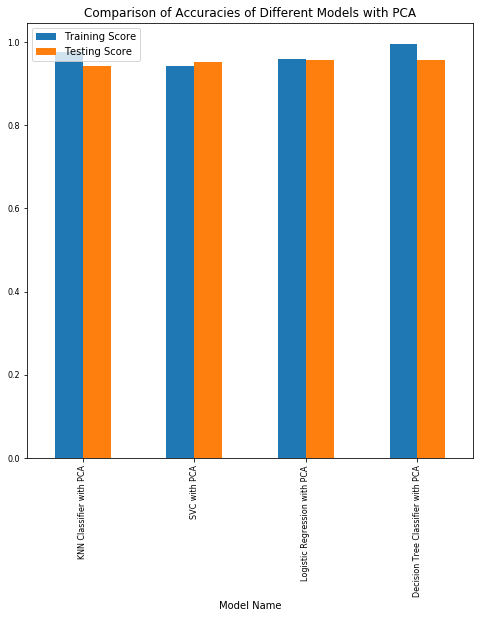

In [106]:
import matplotlib.pyplot as plt

ax = pca_report_table[['Training Score','Testing Score']].plot(kind='bar',
            title = "Comparison of Accuracies of Different Models with PCA", figsize=(8, 8), fontsize = 8)
plt.show()

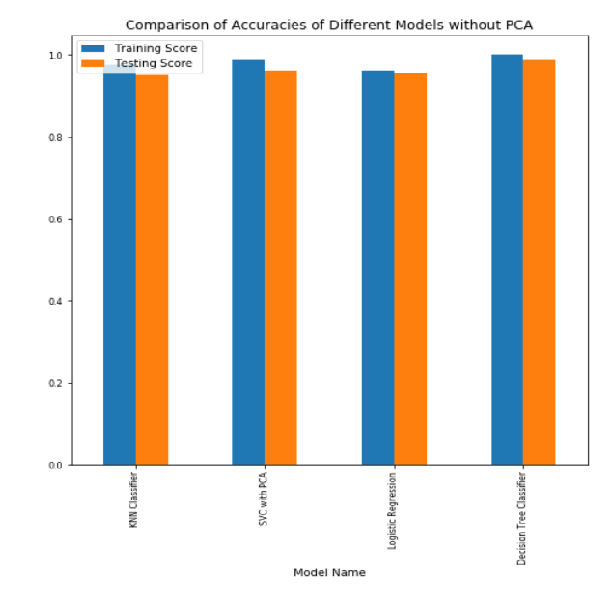

In [107]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0, 0, 1, 1])

# Hide spines, ticks, etc.
ax.axis('off')

# Display the image.
img=mpimg.imread('Classification Report Table without PCA.PNG')
ax.imshow(img, aspect='auto')

## Neural Network Model

In [108]:
from keras.models import Sequential
from keras.layers import Dense,MaxPooling1D
np.random.seed(0)

model = Sequential()
model.add(Dense(10, input_dim = 10, activation = 'sigmoid'))
model.add(Dense(1))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 40, batch_size = 50)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
570/570 [==============================] - 1s 1ms/step - loss: 0.6370 - acc: 0.6228
Epoch 2/40
570/570 [==============================] - 0s 47us/step - loss: 0.6178 - acc: 0.6561
Epoch 3/40
570/570 [==============================] - 0s 50us/step - loss: 0.5997 - acc: 0.6737
Epoch 4/40
570/570 [==============================] - 0s 39us/step - loss: 0.5821 - acc: 0.7263
Epoch 5/40
570/570 [==============================] - 0s 55us/step - loss: 0.5659 - acc: 0.7386
Epoch 6/40
570/570 [==============================] - 0s 50us/step - loss: 0.5494 - acc: 0.7807
Epoch 7/40
570/570 [==============================] - 0s 51us/step - loss: 0.5335 - acc: 0.8053
Epoch 8/40
570/570 [==============================] - 0s 55us/step - loss: 0.5181 - acc: 0.8211
Epoch 9/40
570/570 [==============================] - 0s 51us/step - loss: 0.5036 - acc: 0.8351
Epoch 10/40
570/5

In [109]:
from sklearn.metrics import accuracy_score
y_train_pred = model.predict(X_train)
y_train_pred = np.where(y_train_pred >= 0.5 , 1, 0)
y_test_pred = model.predict(X_test)
y_test_pred = np.where(y_test_pred >= 0.5 , 1, 0)
print("NN Train Score: ",accuracy_score(y_train, y_train_pred))
print("NN Test Score: ", accuracy_score(y_test, y_test_pred))

NN Train Score:  0.8807017543859649
NN Test Score:  0.8631578947368421


# Model Selection

Amongst all the models Logistic Regression model with PCA seems to be the best model. 

In [110]:
print("Logistic Regression with PCA Training Score: ", pca_lr.score(X_train_reduced, y_train))
print("Logistic Regression with PCA Testing Score: ", pca_lr.score(X_test_reduced, y_test))

Logistic Regression with PCA Training Score:  0.9596491228070175
Logistic Regression with PCA Testing Score:  0.9578947368421052


In [111]:
y_predicted = pca_lr.predict(X_test_reduced)
print("Predicted value for 1st testing row: ", y_predicted[0])
print("Original value for 1st testing row: ", y_test.values[0])
print("")
print("Predicted value for 5th testing row: ", y_predicted[4])
print("Original value for 5th testing row: ", y_test.values[4])

Predicted value for 1st testing row:  0.0
Original value for 1st testing row:  0.0

Predicted value for 5th testing row:  1.0
Original value for 5th testing row:  1.0


The model works pretty well on the test data as well.

**Training and testing score of around 0.95 was achieved using Logistic Regression.** 